<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/fdm_euler1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forward Euler Method

* We show how to solve the ordinary differential equation  
  $\qquad
  y' = 3x^2(y+1)
  \newcommand{\Dx}{\Delta x}
  \newcommand{\Dy}{\Delta y}
  \newcommand{\Dz}{\Delta z}
  \newcommand{\Dt}{\Delta t}
  \newcommand{\Ds}{\Delta s}
  \newcommand{\Du}{\Delta u}
  \newcommand{\U}{\mathbf{U}}
  \renewcommand{\V}{\mathbf{V}}
  $  
  By the forward Euler method  
  $\qquad\displaystyle
  y_{i+1} = y_i + F(x_i, y_i) \Dx
  $

* Our interval $[0,2]$ is divided to $n$ equal subintervals
  $x_i = 2/n$. The array $y_i$ is obtained by the recursive formula
  above.

In [1]:
%pip install -q https://samyzaf.com/fdmtools-4.zip
from fdmtools import *
plt.rcParams.update({"axes.grid" : True})
plt.rcParams['grid.linestyle'] = ':'

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


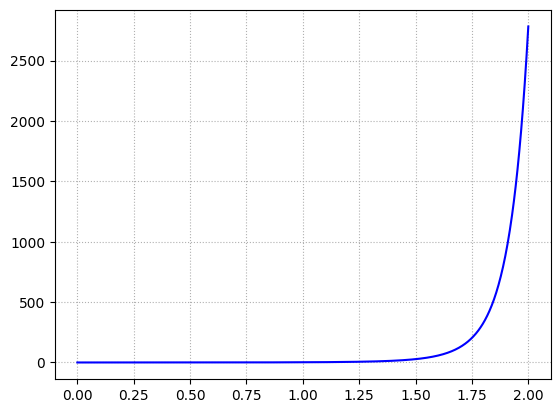

In [4]:
a = 0
b = 2
N = 1000
dx = (b-a)/N
Y = np.zeros(N+1)           # Array for the FDM solution
Y[0] = 0  # initial condition y(0) = 0
X = np.array([a + i*dx for i in range(N+1)])
for i in range(0, N):
    Y[i+1] = Y[i] + 3*X[i]**2 * (Y[i] + 1) * dx

plt.plot(X, Y, color="blue", linewidth=1.5)

* The real solution to this problem is $y(x) = e^{x^3} - 1$.
* Lets draw it using matplotlib.

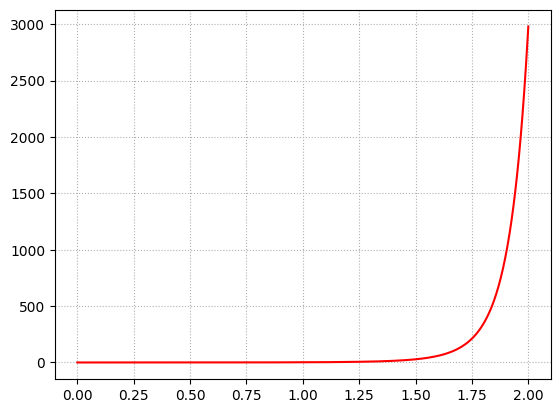

In [5]:
plt.grid('on', linestyle=':')
plt.plot(X, np.exp(X**3) - 1, color="red", linewidth=1.5)

* The graphs look identical. But to get a better impression
  on how close they are we should draw them together on the same axis.

* We will use a blue line for the numerical solution, and dashed red
  line for the real solution.

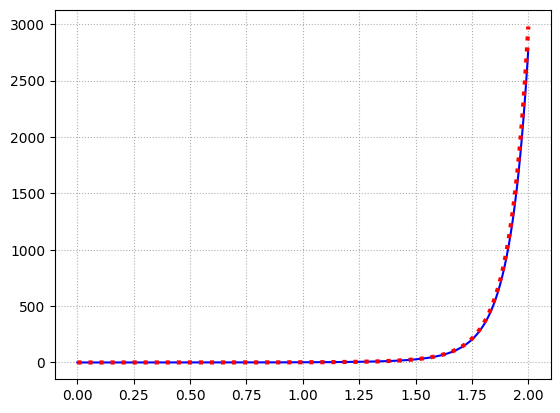

In [6]:
plt.plot(X, Y, color="blue", linewidth=1.5)
plt.plot(X, np.exp(X**3) - 1, color="red", linewidth=3.0, linestyle=':')

* But of course, visual graphs are not enough, so we need
  to make a careful numerical check

Max err = 198.20818559056397


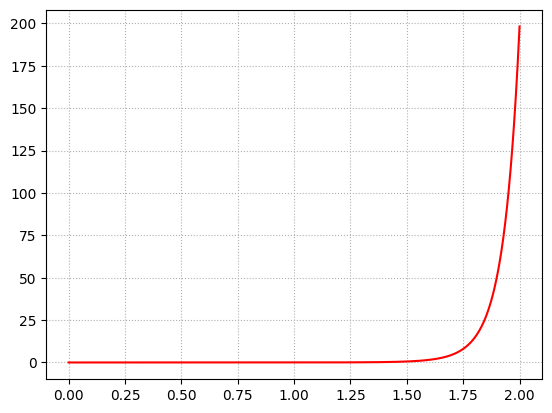

In [8]:
Yreal = np.exp(X**3) - 1          # The real solution
E = np.abs(Y - Yreal)             # The real error
print(f"Max err = {E.max()}")

plt.plot(X, E, color="red", linewidth=1.5)

* Looks like the error is very small on the interval $[0,1.75]$,
  and getting larger when we're getting close to $x=2.0$.

* However, the values in this area are very high ($y(x)=e^{x^3} - 1$)
  so we need to divide by $y(x)$.

Max relative err = nan


<ipython-input-13-490efc5df916>:2: RuntimeWarning: invalid value encountered in divide
  E = np.abs(Y - Yreal)/Yreal             # Relative error


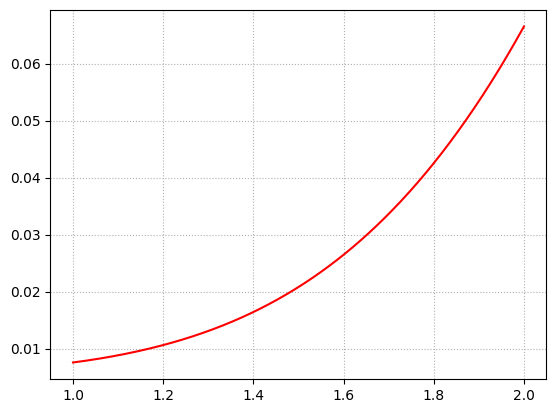

In [13]:
m = N//2                                # Center index
E = np.abs(Y - Yreal)/Yreal             # Relative error
print(f"Max relative err = {E.max()}")

plt.plot(X[m:], E[m:], color="red", linewidth=1.5)

* The relative error near near $x=2.0$ is $0.06$.
* So we may need to use a larger division like $N=10000$?

In [18]:
a = 0
b = 2
N = 10000
dx = (b-a)/N
Y = np.zeros(N+1)           # Array for the FDM solution
Y[0] = 0                    # initial condition y(0) = 0
X = np.array([a + i*dx for i in range(N+1)])
for i in range(0, N):
    Y[i+1] = Y[i] + 3*X[i]**2 * (Y[i] + 1) * dx

Max relative err = nan


<ipython-input-20-e06c68e3e160>:3: RuntimeWarning: invalid value encountered in divide
  E = np.abs(Y - Yreal)/Yreal             # Relative error


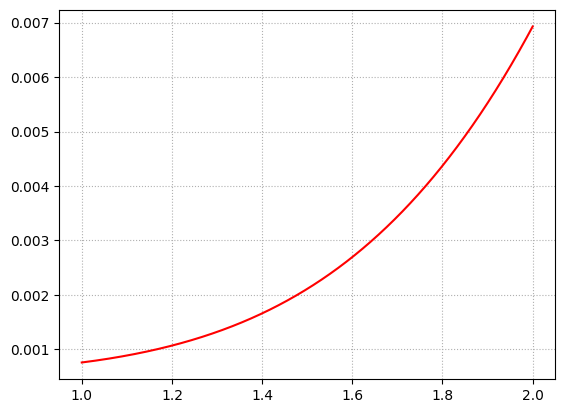

In [20]:
Yreal = np.exp(X**3) - 1
m = N//2                                # Center index
E = np.abs(Y - Yreal)/Yreal             # Relative error
print(f"Max relative err = {E.max()}")

plt.plot(X[m:], E[m:], color="red", linewidth=1.5)

* So changing $N=1000$ to $N=10000$ seems to get us better precision
  near the problematic endpoint $x=2.0$.